# Testing Imbrie's model

This notebook serves as an introduction to ```1D_spin_chains``` package usage
and also provides an implementation of the Imbrie's model.

The model is as follows: 
$$
 H  = \sum_{i=-K}^{K'} h_i S_i^z + \sum_{i=-K}^{K'} \gamma_i S_i^x + \sum_{i=-K-1}^{K'} J_i S_i^z S_{i+1}^z,
$$
where $h_i,\, \gamma_i$ and $J_i$ are sampled according to some probability distributions. 

In our code, we set (chain length) $L=4$. So that we can compare different implementations, we first neglect
the supposed randomness and set $J=1,\,\gamma=1,\, h_i=1.$

## Setting up the Hamiltonian.

In [53]:
# import the needed modules
from scipy.sparse import linalg
from scipy import sparse as ssp
from scipy.linalg import eigvalsh
import matplotlib.pyplot as plt

from hamiltonian import hamiltonian as hm
# define the parameters
L = 4
J = 1.
gamma = 1.
h = 1.

# set up the coupling constants

# S^z term -> a nested list of interaction parameters and
# sites on which the operators act on
h_z = [[h, i] for i in range(L)]
# S^x term
gamma_x = [[gamma, i] for i in range(L)]
# The two-site interaction term -> consider PBC
J_zz = [[J, i, (i+1)%L] for i in range(L)]

# define the interaction type for the corresponding 
# coupling lists
ham_static = [['z', h_z], ['x', gamma_x], ['zz', J_zz]]

# build the imbrie model hamiltonian
imbrie_model = hm.hamiltonian(L, ham_static, [])

In [54]:
imbrie_model.ham

Please wait, building the Hamiltonian ...
Building the Hamiltonian finished!


<16x16 sparse matrix of type '<class 'numpy.float64'>'
	with 76 stored elements in Compressed Sparse Row format>

In [55]:
# obtain the eigenvalues

eigvals = eigvalsh(imbrie_model.ham.todense())
print(eigvals)

Please wait, building the Hamiltonian ...
Building the Hamiltonian finished!
[-2.55111100e+00 -1.80193774e+00 -1.41421356e+00 -1.41421356e+00
 -1.20053099e+00 -5.45513972e-01 -4.45041868e-01 -2.18038863e-16
 -1.28993825e-16  3.70702492e-16  2.15333983e-01  1.24697960e+00
  1.41421356e+00  1.41421356e+00  1.59377147e+00  3.48805050e+00]


Please wait, building the Hamiltonian ...
Building the Hamiltonian finished!


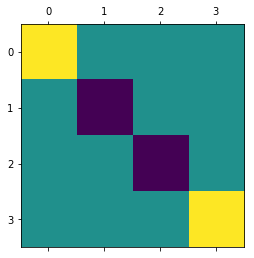

In [52]:
plt.matshow(np.real(imbrie_model.ham.todense()))